# DATA UNDERSTANDING
# Importing all the neccessary libraries needed for the heart disease prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
sns.set()

# READING THE DATASET FILE AND SHOWING THE NAMES OF THE COLUMNS

In [3]:
data= pd.read_csv('heart data.csv')
data.head()
#chestpain type, resting blood pressure, serum cholestoral,fasting blood pressure,resting electocardiographic results,maximum heartrate acheived,exercise induced angina,,st depression induced by expeercise relative to rest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# DATA PREPARATION(DATA CLEANING )

# QUICK DATA EXPLORATION
# THE NEXT CODE SHOWS THE DATA SET HAS 303 ROWS AND 14 COLUMNS 

In [4]:
data.shape

(303, 14)

# CHECKING IF THERE IS ANY NULL VALUE

In [5]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

# FROM THE ABOVE WE CAN SEE THERE ARE NO NULL VALUES 'FALSE'

# THIS NEXT CODE SHOWS THE TOTAL INFORMATION ABOUT THE DATASET

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# USING THE TARGET VARIABLE TO GET THE NUMBER OF PEOPLE THAT HAVE HEART DISEASE OR NOT WHICH IS REPRESENTED BY O AND 1

In [8]:
#checking the distribution of target variable
data['target'].value_counts()


1    165
0    138
Name: target, dtype: int64

In [9]:
print('1 represents people that have heart disease while 0 represents healthy hearts')

1 represents people that have heart disease while 0 represents healthy hearts


# SHOWING THE CORRELATION IN THE DATA SET

In [10]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


#### DATA VISUALIZATION

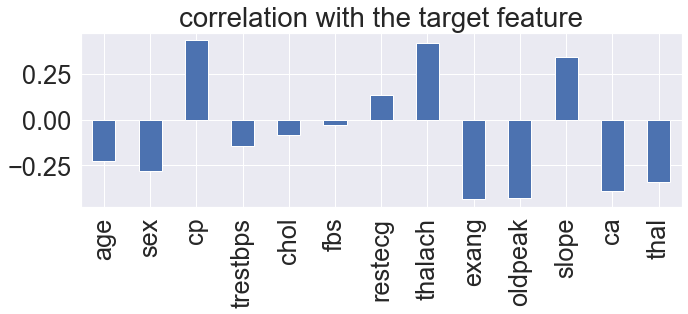

In [33]:
sns.set_context('notebook',font_scale=2.3)
data.drop('target',axis=1).corrwith(data.target).plot(kind='bar', grid=True ,figsize=(10,5),title="correlation with the target feature")
plt.tight_layout()

### INFERENCE:Insight from the above graphy are:
 1)four feature("cp",restecg","thalach", "slope") 
are postively correlated with the targetfeature.
 2)other  feature are negatively correlation wuith the target feature.
 so we have  done enough collective analysis now let's for the analysis of the individual and bivaariate analysis.
        

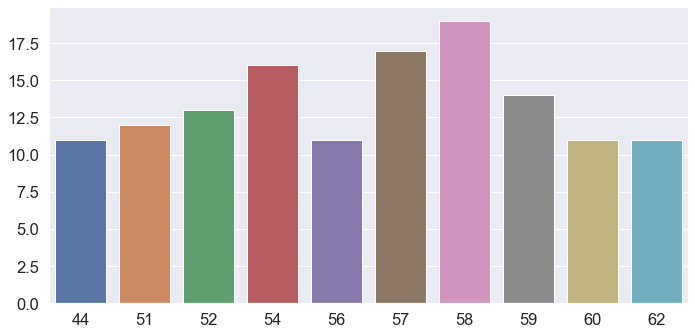

In [12]:
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale=1.5)
sns.barplot(x=data .age .value_counts()[:10].index, y=data.age.value_counts()[:10].values)
#plt.show()
plt.tight_layout()

## inference: here we can see that the 58 age column has the highest frequency.

In [13]:
minAge=min(data.age)   
maxAge=max(data.age)
meanAge=data.age.mean()
print('Min Age:', minAge)
print('Max Age:', maxAge)
print('Mean age;',meanAge)

Min Age: 29
Max Age: 77
Mean age; 54.366336633663366


### inference:we should divide the age feature into three parts-"young","Middle",and"Elder",    

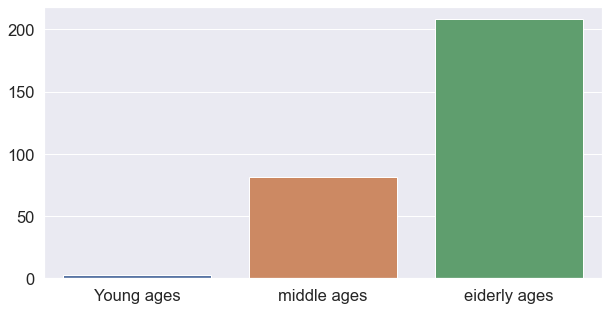

In [34]:
young=data[(data.age>=25)&(data. age<35)]
Middle=data[(data.age>35)&(data.age<50)]
Elder=data[(data.age>50)]
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale=1.5)
sns.barplot(x=['Young ages','middle ages','eiderly ages'],y=[len(young),len(Middle),len(Elder)])
plt.tight_layout
plt.show()

### inference: here we can see that elder people are the most affectted by heart disease and young one re leastt affected.

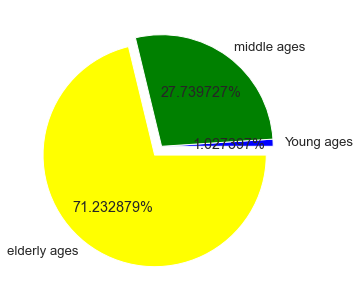

In [35]:
colors=['blue', 'green','yellow',]
explode=[0,0,0.1]
plt.figure(figsize=(5,10))
sns.set_context('notebook',font_scale=1.2)
plt.pie([len(young),len(Middle),len(Elder)],labels=['Young ages','middle ages','elderly ages'],explode= explode, colors=colors,autopct='%1f%%')
plt.show()

### infrence: To prove the above inference we will  plot the pie chart.

C:\Users\Magic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


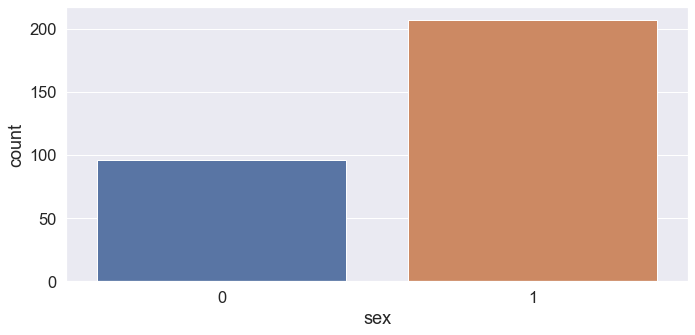

In [36]:
plt.figure(figsize=(10,5))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(data['sex'])
plt.tight_layout()
plt.show()

# inference: here it is clearly visisible that. ratio of Male to Female is approx2:1

C:\Users\Magic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


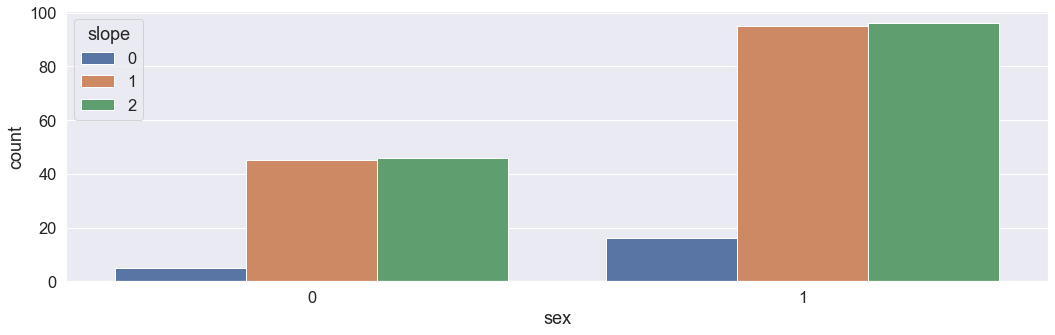

In [17]:
plt. figure(figsize=(15,5))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(data['sex'],hue=data['slope'])
plt.tight_layout()

# inference:here it is clearly visible that the slop value is higher in the case of male (1).

C:\Users\Magic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


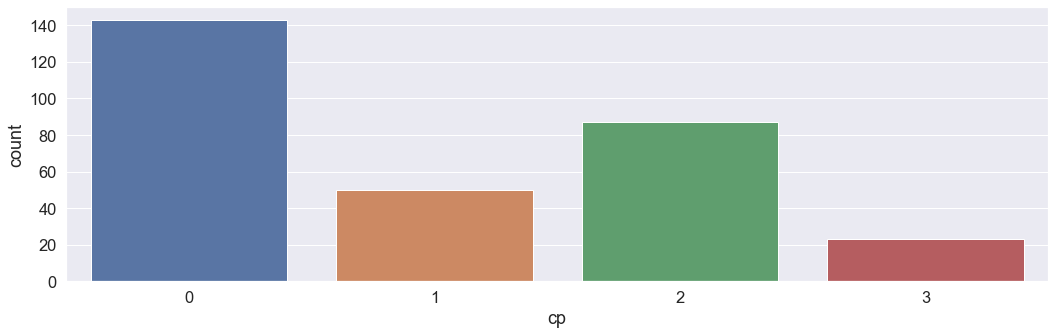

In [18]:
plt.figure(figsize=(15,5))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(data['cp'])
plt.tight_layout()

## inference:As seen there are 4 types of  chest pain
    1. status at least
    2. condition slightly distressed
    3. condition medium problem
    4. condition too bad

C:\Users\Magic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


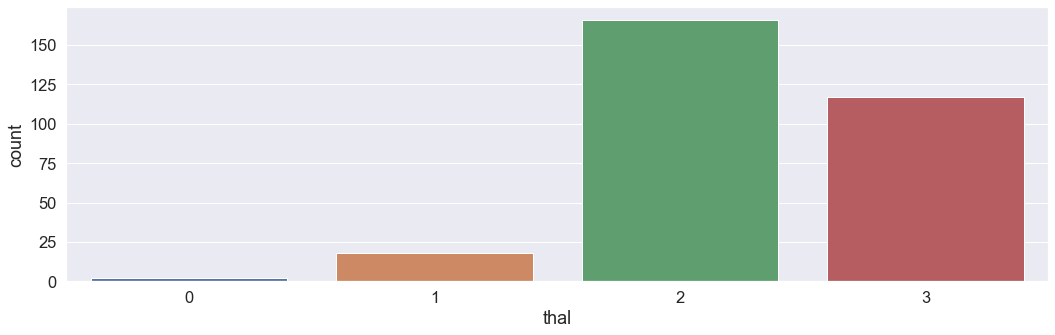

In [19]:
plt.figure(figsize=(15,5))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(data['thal'])
plt.tight_layout()

## inference: elderly people are more likely to  have chest pain.

C:\Users\Magic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


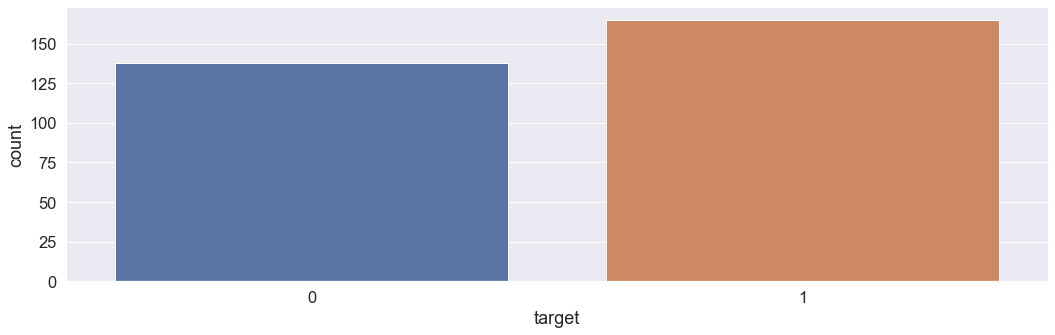

In [20]:
plt.figure(figsize=(15,5))
sns.set_context('notebook',font_scale=1.5)
sns.countplot(data['target'])
plt.tight_layout()

### inference: The ratio between 1and 0 is much less than  1.5 which  indicates that the target feature is not inbalanced. accuracy _score as evaluuateion metrics for our model.

# Proceeding to split the feature and target 

In [21]:
x=data.drop(columns='target', axis=1)
y=data['target']

In [22]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [23]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


# TESTING AND TRAINING THE DATA

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=10)

In [25]:
print(x.shape,X_train.shape,X_test.shape)

(303, 13) (242, 13) (61, 13)


## MODEL TRAINING USING LOGISTIC REGRESSION

In [37]:
model=LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\Magic\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# MODEL EVALUATION

In [27]:
 #ACCURACY ON TRAINING DATA
X_train_prediction= model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction, Y_train)

In [28]:
print('accuracy on training data:',training_data_accuracy)

accuracy on training data: 0.8305785123966942


In [29]:
 #ACCURACY ON TESTING DATA
X_test_prediction= model.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction, Y_test)

In [30]:
print('accuracy on testing data:',testing_data_accuracy)

accuracy on testing data: 0.8852459016393442


# building a predictive system

In [31]:
input_data=(37,1,2,130,250,0,1,187,0,3.5,0,0,2)
#changing the input data to an numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshaping my input data because we are using one instance
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)

print(prediction)
if (prediction[0]==0):
    print ('The Person does not have an heart disease')
else:
        print('the person has an heart disease')
    
input_data2=(70,1,2,160,269,0,1,112,1,2.9,1,1,3)
input_data2_as_numpy_array=np.asarray(input_data2)
input_data2_reshaped= input_data2_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data2_reshaped)
print(prediction)

if (prediction[0]==0):
    print ('The Person does not have an heart disease')
else:
        print('the person has an heart disease')

[1]
the person has an heart disease
[0]
The Person does not have an heart disease


In [32]:
input_data=(60,0,3,130,369,1,2,112,0,2.9,1,1,3)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)


[1]
